# Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz
import matplotlib.pyplot as plt

# Loading Data

In [22]:
#Regression Data
boston = datasets.load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.3)
#Classification Data
iris = datasets.load_iris()
x, xt, y, yt = train_test_split(iris.data, iris.target, test_size = 0.2)

# Decision Tree Regressor

In [29]:
regressor = tree.DecisionTreeRegressor()
regressor.fit(x_train, y_train)
regressor.score(x_test, y_test)

0.7472604390283806

### Printing the tree formed

In [9]:
dot_data = tree.export_graphviz(regressor, out_file = None)
graph = graphviz.Source(dot_data)
# graph

# Decision Tree Classifier

In [24]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(x, y)
clf.score(xt,yt)

0.9666666666666667

In [30]:
dot_data = tree.export_graphviz(clf, out_file = None)
graph = graphviz.Source(dot_data)
# graph

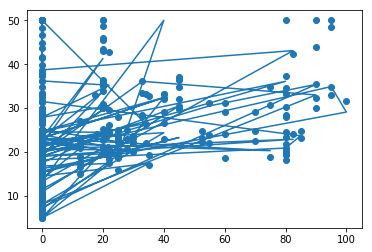

In [31]:
plt.scatter(boston.data[:,1], boston.target)
yp = regressor.predict(x_test)
plt.plot(x_test[:,1], yp)

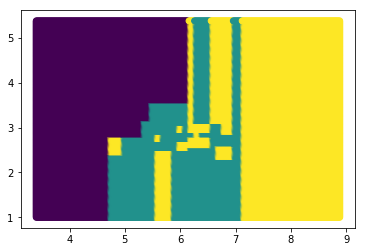

In [32]:
# fitting for 2 dimensions in order to plot decision boundary
clf.fit(x[:,:2],y)
def make_grid(x, h = 0.02):
    x1_min = x[:,0].min() - 1
    x1_max = x[:,0].max() + 1
    x2_min = x[:,1].min() - 1
    x2_max = x[:,1].max() + 1
    a = np.arange(x1_min, x1_max, h)
    b = np.arange(x2_min, x2_max, h)
    xx, yy = np.meshgrid(a,b)
    return xx, yy

xx, yy = make_grid(x[:,:2])
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()